Downloads :

In [ ]:
!pip install kagglehub

Import :

In [ ]:
import kagglehub
import os
import shutil
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import random
from IPython.display import Image,display
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input,Model
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, Add, ReLU, UpSampling2D
from keras.optimizers import Adam


In [ ]:


# Download latest version
path = kagglehub.dataset_download("rhtsingh/google-universal-image-embeddings-128x128")

print("Path to dataset files:", path)

100%|██████████| 1.36G/1.36G [00:25<00:00, 58.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rhtsingh/google-universal-image-embeddings-128x128/versions/1


In [ ]:
shutil.move(path,"./")

'./1'

In [ ]:

def move_and_rename_images(source_folder, destination_folder):
    """
    Moves all images from a source folder (including subfolders) to a destination folder,
    renaming them sequentially as image1, image2, etc.

    Args:
        source_folder: The path to the source folder.
        destination_folder: The path to the destination folder.
    """

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more if needed
    image_files = []
    for root, _, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(image_extensions):
                image_files.append(os.path.join(root, file))

    for i, image_file in enumerate(image_files):
        new_filename = f"image{i+1}{os.path.splitext(image_file)[1]}"
        destination_path = os.path.join(destination_folder, new_filename)
        try:
          shutil.move(image_file, destination_path)
          print(f"Moved and renamed '{image_file}' to '{destination_path}'")
        except shutil.Error as e:
          print(f"Error moving '{image_file}': {e}")
        except FileNotFoundError as e:
          print(f"Error moving '{image_file}': {e}")


move_and_rename_images("./1/128x128", "./dataset")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Moved and renamed './1/128x128/storefronts/image1812.jpeg' to './dataset/image127529.jpeg'
Moved and renamed './1/128x128/storefronts/image0624.jpeg' to './dataset/image127530.jpeg'
Moved and renamed './1/128x128/storefronts/image4526.jpeg' to './dataset/image127531.jpeg'
Moved and renamed './1/128x128/storefronts/image1808.jpeg' to './dataset/image127532.jpeg'
Moved and renamed './1/128x128/storefronts/image3089.jpeg' to './dataset/image127533.jpeg'
Moved and renamed './1/128x128/storefronts/image3128.jpeg' to './dataset/image127534.jpeg'
Moved and renamed './1/128x128/storefronts/image4347.png' to './dataset/image127535.png'
Moved and renamed './1/128x128/storefronts/image0915.jpeg' to './dataset/image127536.jpeg'
Moved and renamed './1/128x128/storefronts/image1381.jpeg' to './dataset/image127537.jpeg'
Moved and renamed './1/128x128/storefronts/image3556.jpeg' to './dataset/image127538.jpeg'
Moved and rena

In [ ]:

dataset_path = "/content/dataset"
image_count = 0

for filename in os.listdir(dataset_path):
    if os.path.isfile(os.path.join(dataset_path, filename)):
        image_count += 1

print(f"Nombre d'images dans le dossier dataset/dataset : {image_count}")

Nombre d'images dans le dossier dataset/dataset : 132528


In [ ]:

def resize_images(source_folder, destination_folder):
    """
    Resizes all images in a source folder by half and saves them to a destination folder.

    Args:
        source_folder: Path to the source folder containing images.
        destination_folder: Path to the destination folder for resized images.
    """

    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if os.path.isfile(source_path):
            try:
                img = cv2.imread(source_path)
                if img is not None:
                    height, width = img.shape[:2]
                    resized_img = cv2.resize(img, (width // 2, height // 2))
                    destination_path = os.path.join(destination_folder, filename)
                    cv2.imwrite(destination_path, resized_img)
                    print(f"Resized and saved: {filename}")
                else:
                    print(f"Could not read image: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")


resize_images("./dataset", "./resized_dataset")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Resized and saved: image128664.jpeg
Resized and saved: image59022.png
Resized and saved: image125240.jpeg
Resized and saved: image87911.jpg
Resized and saved: image60614.jpg
Resized and saved: image125074.png
Resized and saved: image18914.jpg
Resized and saved: image95888.jpg
Resized and saved: image50462.jpeg
Resized and saved: image61381.jpg
Resized and saved: image50676.jpeg
Resized and saved: image118926.jpg
Resized and saved: image21983.jpg
Resized and saved: image71342.png
Resized and saved: image118883.jpg
Resized and saved: image64922.jpg
Resized and saved: image69652.jpg
Resized and saved: image32737.jpg
Resized and saved: image61752.jpg
Resized and saved: image72805.png
Resized and saved: image21754.jpg
Resized and saved: image25671.jpg
Resized and saved: image742.jpeg
Resized and saved: image89018.jpg
Resized and saved: image109622.jpg
Resized and saved: image114632.jpg
Resized and saved: image7809

In [ ]:

def downscaleImage_blur(input_path, output_path, scale=3, kernel_size=3):

    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Liste tous les fichiers dans le dossier d'entrée
    for filename in os.listdir(input_path):
        # Crée le chemin complet du fichier
        input_image_path = os.path.join(input_path, filename)

        # Vérifie que c'est un fichier image (extensions .jpg, .jpeg, .png, etc.)
        if os.path.isfile(input_image_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            # Charger l'image haute résolution (HR)
            img_hr = cv2.imread(input_image_path)

            # Vérifier que l'image a été correctement chargée
            if img_hr is None:
                print(f"Erreur lors du chargement de l'image : {input_image_path}")
                continue

            # Appliquer un flou gaussien à l'image
            img_blurred = cv2.GaussianBlur(img_hr, (kernel_size, kernel_size), 0)

            # Récupérer la taille originale de l'image
            height, width = img_hr.shape[:2]

            # Sous-échantillonner l'image par un facteur de downscaling
            lr_img = cv2.resize(img_blurred, (width // scale, height // scale), interpolation=cv2.INTER_CUBIC)

            # Rééchantillonner à la taille d'origine en utilisant l'interpolation bicubique
            lr_img = cv2.resize(lr_img, (width, height), interpolation=cv2.INTER_CUBIC)

            # Créer le chemin pour sauvegarder l'image downscalée dans le dossier de sortie
            output_image_path = os.path.join(output_path, filename)

            # Sauvegarder l'image basse résolution (LR) dans le dossier de sortie
            cv2.imwrite(output_image_path, lr_img)


In [ ]:
#downscale without blur
def downscaleImage(input_path, output_path, scale=2):

    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Liste tous les fichiers dans le dossier d'entrée
    for filename in os.listdir(input_path):
        # Crée le chemin complet du fichier
        input_image_path = os.path.join(input_path, filename)

        # Vérifie que c'est un fichier image (extensions .jpg, .jpeg, .png, etc.)
        if os.path.isfile(input_image_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
            # Charger l'image haute résolution (HR)
            img_hr = cv2.imread(input_image_path)

            # Vérifier que l'image a été correctement chargée
            if img_hr is None:
                print(f"Erreur lors du chargement de l'image : {input_image_path}")
                continue

            # Récupérer la taille originale de l'image
            height, width = img_hr.shape[:2]

            # Sous-échantillonner l'image par un facteur de downscaling
            lr_img = cv2.resize(img_hr, (width // scale, height // scale), interpolation=cv2.INTER_AREA)

            # Rééchantillonner à la taille d'origine en utilisant l'interpolation bicubique
            lr_img = cv2.resize(lr_img, (width, height), interpolation=cv2.INTER_CUBIC)

            # Créer le chemin pour sauvegarder l'image downscalée dans le dossier de sortie
            output_image_path = os.path.join(output_path, filename)

            # Sauvegarder l'image basse résolution (LR) dans le dossier de sortie
            cv2.imwrite(output_image_path, lr_img)

In [ ]:
shutil.rmtree("./dataset_lr")


In [ ]:
input_directory = "/content/resized_dataset"
output_directory = "/content/resized_dataset_lr"
downscaleImage(input_directory, output_directory, scale=2)


In [ ]:

input_directory = "/content/resized_dataset"
output_directory = "/content/resized_dataset_lr"
downscaleImage_blur(input_directory, output_directory, scale=3,kernel_size=3)

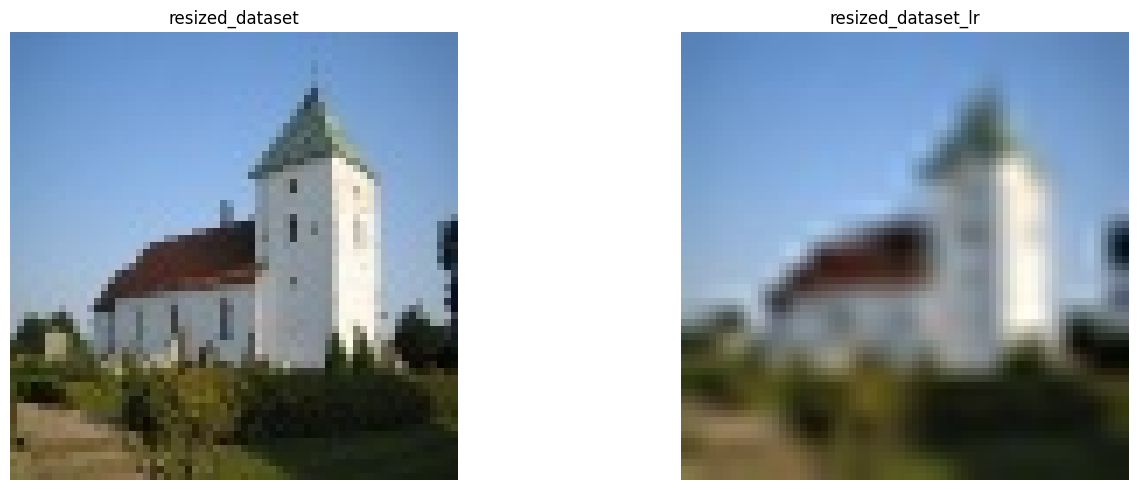

In [ ]:

def plot_image_from_folders(index):
    """Plots the image at the given index from three different folders."""

    folders = [
        "/content/resized_dataset",
        "/content/resized_dataset_lr",
    ]
    filenames = [f"image{index+1}.jpg" for _ in folders]

    fig, axes = plt.subplots(1, len(folders), figsize=(15, 5))

    for i, (folder, filename) in enumerate(zip(folders, filenames)):
      image_path = os.path.join(folder, filename)
      try:
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(os.path.basename(folder))
        axes[i].axis('off')
      except FileNotFoundError:
        axes[i].text(0.5, 0.5, f"Image not found in {folder}", ha='center', va='center')
        axes[i].set_title(os.path.basename(folder))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


plot_image_from_folders(100002)

In [ ]:

def create_coherent_dataframes(hr_dir, lr_dir, fraction=1):
    """
    Creates two pandas DataFrames containing image data from hr_dir and lr_dir,
    ensuring coherence: if an image is present in the hr DataFrame, it must also be
    present in the lr DataFrame. The images are loaded in grayscale (black and white).
    """

    hr_images = [f for f in os.listdir(hr_dir) if os.path.isfile(os.path.join(hr_dir, f))]
    lr_images = [f for f in os.listdir(lr_dir) if os.path.isfile(os.path.join(lr_dir, f))]

    # Find common images
    common_images = list(set(hr_images) & set(lr_images))

    hr_data = []
    lr_data = []

    # Limit to fraction of the common images
    selected_images = random.sample(common_images, int(len(common_images)*fraction))

    for filename in selected_images:
        hr_filepath = os.path.join(hr_dir, filename)
        lr_filepath = os.path.join(lr_dir, filename)
        try:
            # Read images in grayscale using cv2.IMREAD_GRAYSCALE
            hr_img = cv2.imread(hr_filepath, cv2.IMREAD_GRAYSCALE)
            lr_img = cv2.imread(lr_filepath, cv2.IMREAD_GRAYSCALE)

            if hr_img is not None and lr_img is not None:
                hr_data.append([filename, hr_img])
                lr_data.append([filename, lr_img])

        except Exception as e:
            print(f"Error reading image {filename}: {e}")

    hr_df = pd.DataFrame(hr_data, columns=['image_name', 'image'])
    lr_df = pd.DataFrame(lr_data, columns=['image_name', 'image'])

    return hr_df, lr_df


hr_df, lr_df = create_coherent_dataframes("./resized_dataset", "resized_dataset_lr", fraction=0.6)

print("High-resolution DataFrame:")
print(hr_df.head())
print("\nLow-resolution DataFrame:")
print(lr_df.head())

High-resolution DataFrame:
         image_name                                              image
0   image14045.jpeg  [[78, 72, 81, 95, 77, 99, 70, 64, 125, 86, 74,...
1    image30162.jpg  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
2    image40788.jpg  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3    image66060.jpg  [[153, 152, 155, 146, 147, 151, 155, 150, 156,...
4  image122485.jpeg  [[171, 174, 176, 160, 166, 176, 179, 178, 178,...

Low-resolution DataFrame:
         image_name                                              image
0   image14045.jpeg  [[100, 101, 101, 101, 99, 94, 88, 82, 85, 90, ...
1    image30162.jpg  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
2    image40788.jpg  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3    image66060.jpg  [[152, 152, 150, 146, 144, 146, 149, 152, 155,...
4  image122485.jpeg  [[179, 178, 176, 174, 172, 172, 174, 178, 181,...


In [ ]:
print(hr_df.shape)
print(lr_df.shape)

(79516, 2)
(79516, 2)


In [ ]:
shutil.rmtree("./test_hr")
shutil.rmtree("./test_lr")
shutil.rmtree("./train_hr")
shutil.rmtree("./train_lr")
shutil.rmtree("./val_hr")
shutil.rmtree("./val_lr")

FileNotFoundError: [Errno 2] No such file or directory: './test_hr'

In [ ]:

train_hr, remaining_hr, train_lr, remaining_lr = train_test_split(
    hr_df, lr_df, test_size=0.3, random_state=42
)

val_hr, test_hr, val_lr, test_lr = train_test_split(
    remaining_hr, remaining_lr, test_size=0.5, random_state=42
)

# Verify that the splits are coherent
print(len(train_hr), len(train_lr))
print(len(val_hr), len(val_lr))
print(len(test_hr), len(test_lr))

# Create directories for train, validation, and test sets if they don't exist
os.makedirs("train_hr", exist_ok=True)
os.makedirs("train_lr", exist_ok=True)
os.makedirs("val_hr", exist_ok=True)
os.makedirs("val_lr", exist_ok=True)
os.makedirs("test_hr", exist_ok=True)
os.makedirs("test_lr", exist_ok=True)

def save_images_to_directory(df, directory):
  for index, row in df.iterrows():
    image_name = row['image_name']
    image = row['image']
    cv2.imwrite(os.path.join(directory, image_name), image)


save_images_to_directory(train_hr, "train_hr")
save_images_to_directory(train_lr, "train_lr")
save_images_to_directory(val_hr, "val_hr")
save_images_to_directory(val_lr, "val_lr")
save_images_to_directory(test_hr, "test_hr")
save_images_to_directory(test_lr, "test_lr")

55661 55661
11927 11927
11928 11928


In [ ]:
import shutil
import os

def zip_training_folders(source_dirs, zip_filename):
    """Zips multiple directories into a single archive."""
    # Create a temporary directory to hold all the folders to be zipped
    temp_dir = "temp_zip_dir"
    os.makedirs(temp_dir, exist_ok=True)

    # Copy the source directories into the temporary directory
    for source_dir in source_dirs:
        shutil.copytree(source_dir, os.path.join(temp_dir, source_dir))

    # Create the archive from the temporary directory
    shutil.make_archive(zip_filename, 'zip', temp_dir)

    # Remove the temporary directory
    shutil.rmtree(temp_dir)


# Specify the training folders to zip.
training_folders = ["train_hr", "train_lr", "val_hr", "val_lr", "test_hr", "test_lr"]

# Specify the desired name for the zip file.
zip_filename = "training_data"

zip_training_folders(training_folders, zip_filename)

print(f"Successfully created {zip_filename}.zip")

Successfully created training_data.zip
